In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [401]:
# filepath = "./Data/Processed_dataset.csv"
# df = pd.read_csv(filepath)
# df

train_dataset = pd.read_csv("./Data/Train_dataset.csv")
test_dataset = pd.read_csv("./Data/Test_dataset.csv")

In [402]:
# Original training data
X_train_full = train_dataset.drop(columns='label', axis=1)
y_train_full = train_dataset['label']

# Split 80% for training and 10% of the original dataset for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.125, random_state=42
)

# Test set remains the same
X_test = test_dataset.drop(columns='label')
y_test = test_dataset['label']

In [403]:
X_train_full.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1293, 29), (1131, 29), (1131,), (162, 29), (162,))

In [404]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1131, 29), (162, 29), (324, 29), (1131,), (162,), (324,))

In [405]:
# y_train = y_train.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [406]:
class NeuralNetworkModel:
    def __init__(self, model_name='NeuralNetwork'):
        self.model_name = model_name
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # L2 Regularization
            BatchNormalization(),  # Batch Normalization
            Dropout(0.3),  # Increased dropout rate
            Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
            BatchNormalization(),  # Batch Normalization
            Dropout(0.3),  # Increased dropout rate
            Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
            BatchNormalization(),  # Batch Normalization
            Dropout(0.3),  # Increased dropout rate
            Dense(1)  # Output layer (for regression)
        ])

        # Use a slightly higher learning rate
        optimizer = Adam(learning_rate=0.0005)
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mape'])

        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=100, batch_size=16, verbose=1):
        # EarlyStopping with patience to prevent overfitting
        early_stopping = EarlyStopping(patience=7, monitor='val_loss', restore_best_weights=True)

        history = self.model.fit(
            X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=epochs, 
            batch_size=batch_size, 
            verbose=verbose,      
            callbacks=[early_stopping]
        )
        return history

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return predictions

    def save_model(self, file_path):
        self.model.save(file_path)

    def save_keras_model(self, file_path):
        tf.keras.models.save_model(
            self.model,
            file_path,
            overwrite=True,
            include_optimizer=True,
            save_format=None
        )

    @classmethod
    def load_model(cls, file_path):
        model = tf.keras.models.load_model(file_path)
        return model


In [407]:
# model = NeuralNetworkModel()

# model.save_keras_model('model.keras')
 
# # Train the model
# history = model.train(X_train_norm, y_train_norm, X_val_norm, y_val_norm)

# # Make predictions
# predictions = model.predict(X_test_norm)

# # Save the model
# model.save_model("model_NN.h5")

# # Load the model
# loaded_model = NeuralNetworkModel.load_model("model_NN.h5")

In [408]:
model = NeuralNetworkModel()

model.save_keras_model('./models/model.keras')
 
# Train the model
history = model.train(X_train, y_train, X_val, y_val)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100


c:\Users\dzagganas.WINCELL\Desktop\Repos\sedimark\local_model_training_github\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9133 - mae: 1.3698 - mape: 2380.9275 - val_loss: 1.7917 - val_mae: 0.2096 - val_mape: 376.3855
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5091 - mae: 1.0495 - mape: 1436.9303 - val_loss: 1.8033 - val_mae: 0.2427 - val_mape: 454.3778
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4199 - mae: 1.0102 - mape: 1253.3949 - val_loss: 1.7919 - val_mae: 0.2498 - val_mape: 458.9682
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8479 - mae: 0.8452 - mape: 1681.6848 - val_loss: 1.7787 - val_mae: 0.2521 - val_mape: 441.9268
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7442 - mae: 0.8043 - mape: 1703.7263 - val_loss: 1.7690 - val_mae: 0.2468 - val_mape: 344.4319
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5492 - mae: 0.7087 - mape: 1103.3801 - val_loss: 1.7393 - val_mae: 0.2357 - val_mape: 302.1017
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4918 - mae: 0.7

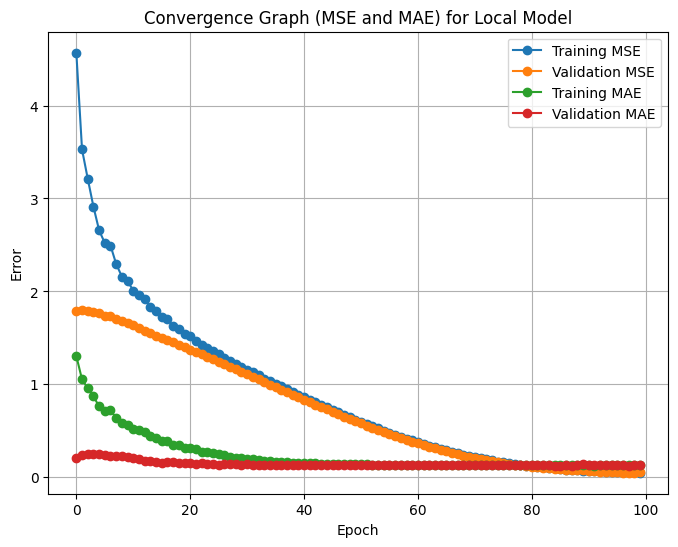

In [409]:
# Plot MSE and MAE over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training MSE', marker='o')
plt.plot(history.history['val_loss'], label='Validation MSE', marker='o')
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Graph (MSE and MAE) for Local Model')
plt.legend()
plt.grid(True)
plt.show()

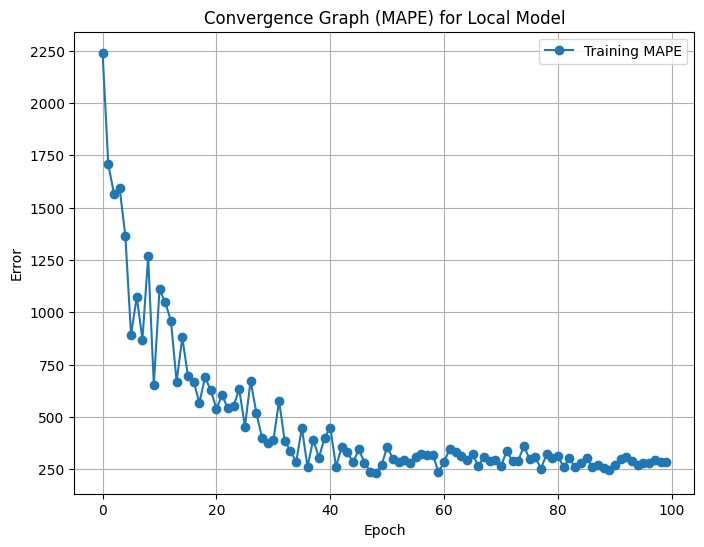

In [410]:
# Plot MAPE over epochs
plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Training MSE', marker='o')
# plt.plot(history.history['val_loss'], label='Validation MSE', marker='o')
plt.plot(history.history['mape'], label='Training MAPE', marker='o')
# plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Graph (MAPE) for Local Model')
plt.legend()
plt.grid(True)
plt.show()

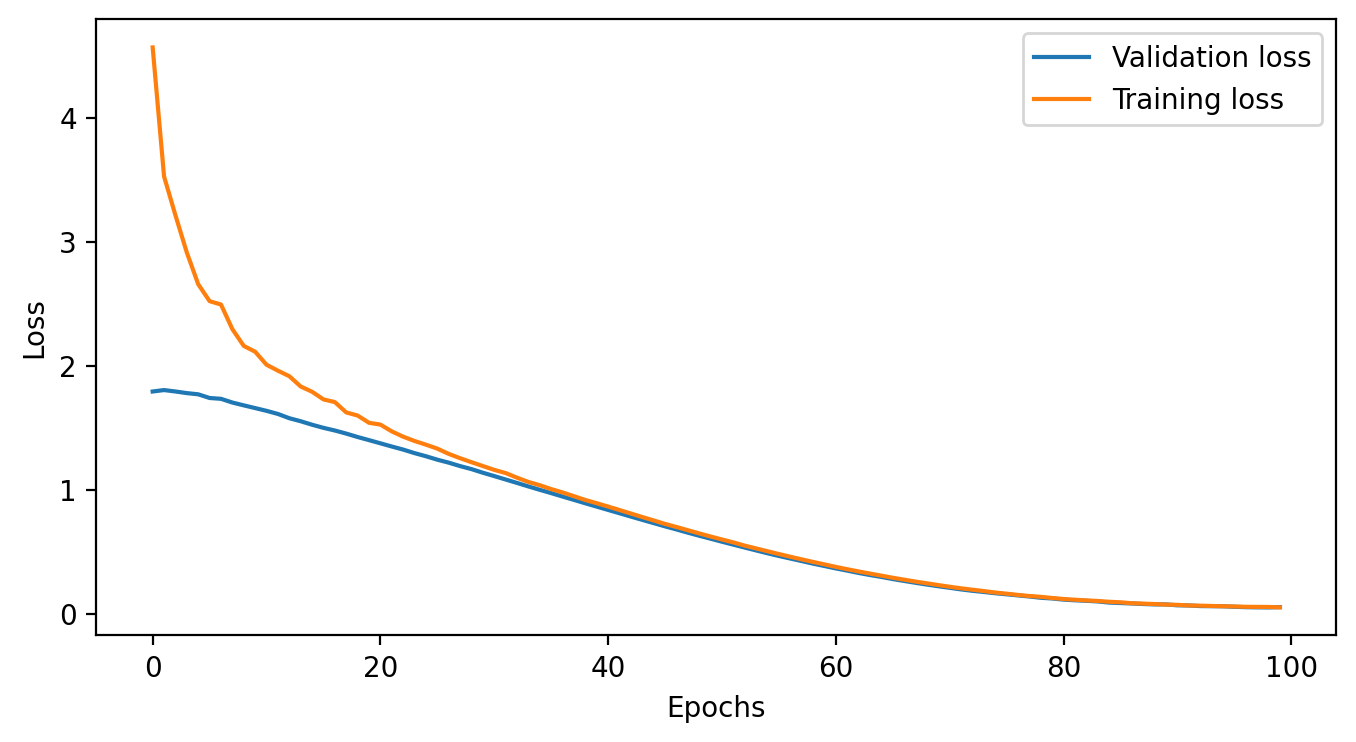

In [411]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(history.history['val_loss'],label='Validation loss')
plt.plot(history.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [412]:
# Load feature quantiles
q5_X, q95_X = joblib.load("./scalers/feature_scaler.pkl")

# Load target quantiles
q5_y, q95_y = joblib.load("./scalers/target_scaler.pkl")

# Unscale the test features using the saved quantiles for features
X_test_unscaled = X_test * (q95_X - q5_X) + q5_X

# Unscale the test target using the saved quantiles for target
y_test_unscaled = y_test * (q95_y - q5_y) + q5_y

# Unscale the predictions (after getting them from the model)
predictions_unscaled = predictions * (q95_y - q5_y) + q5_y


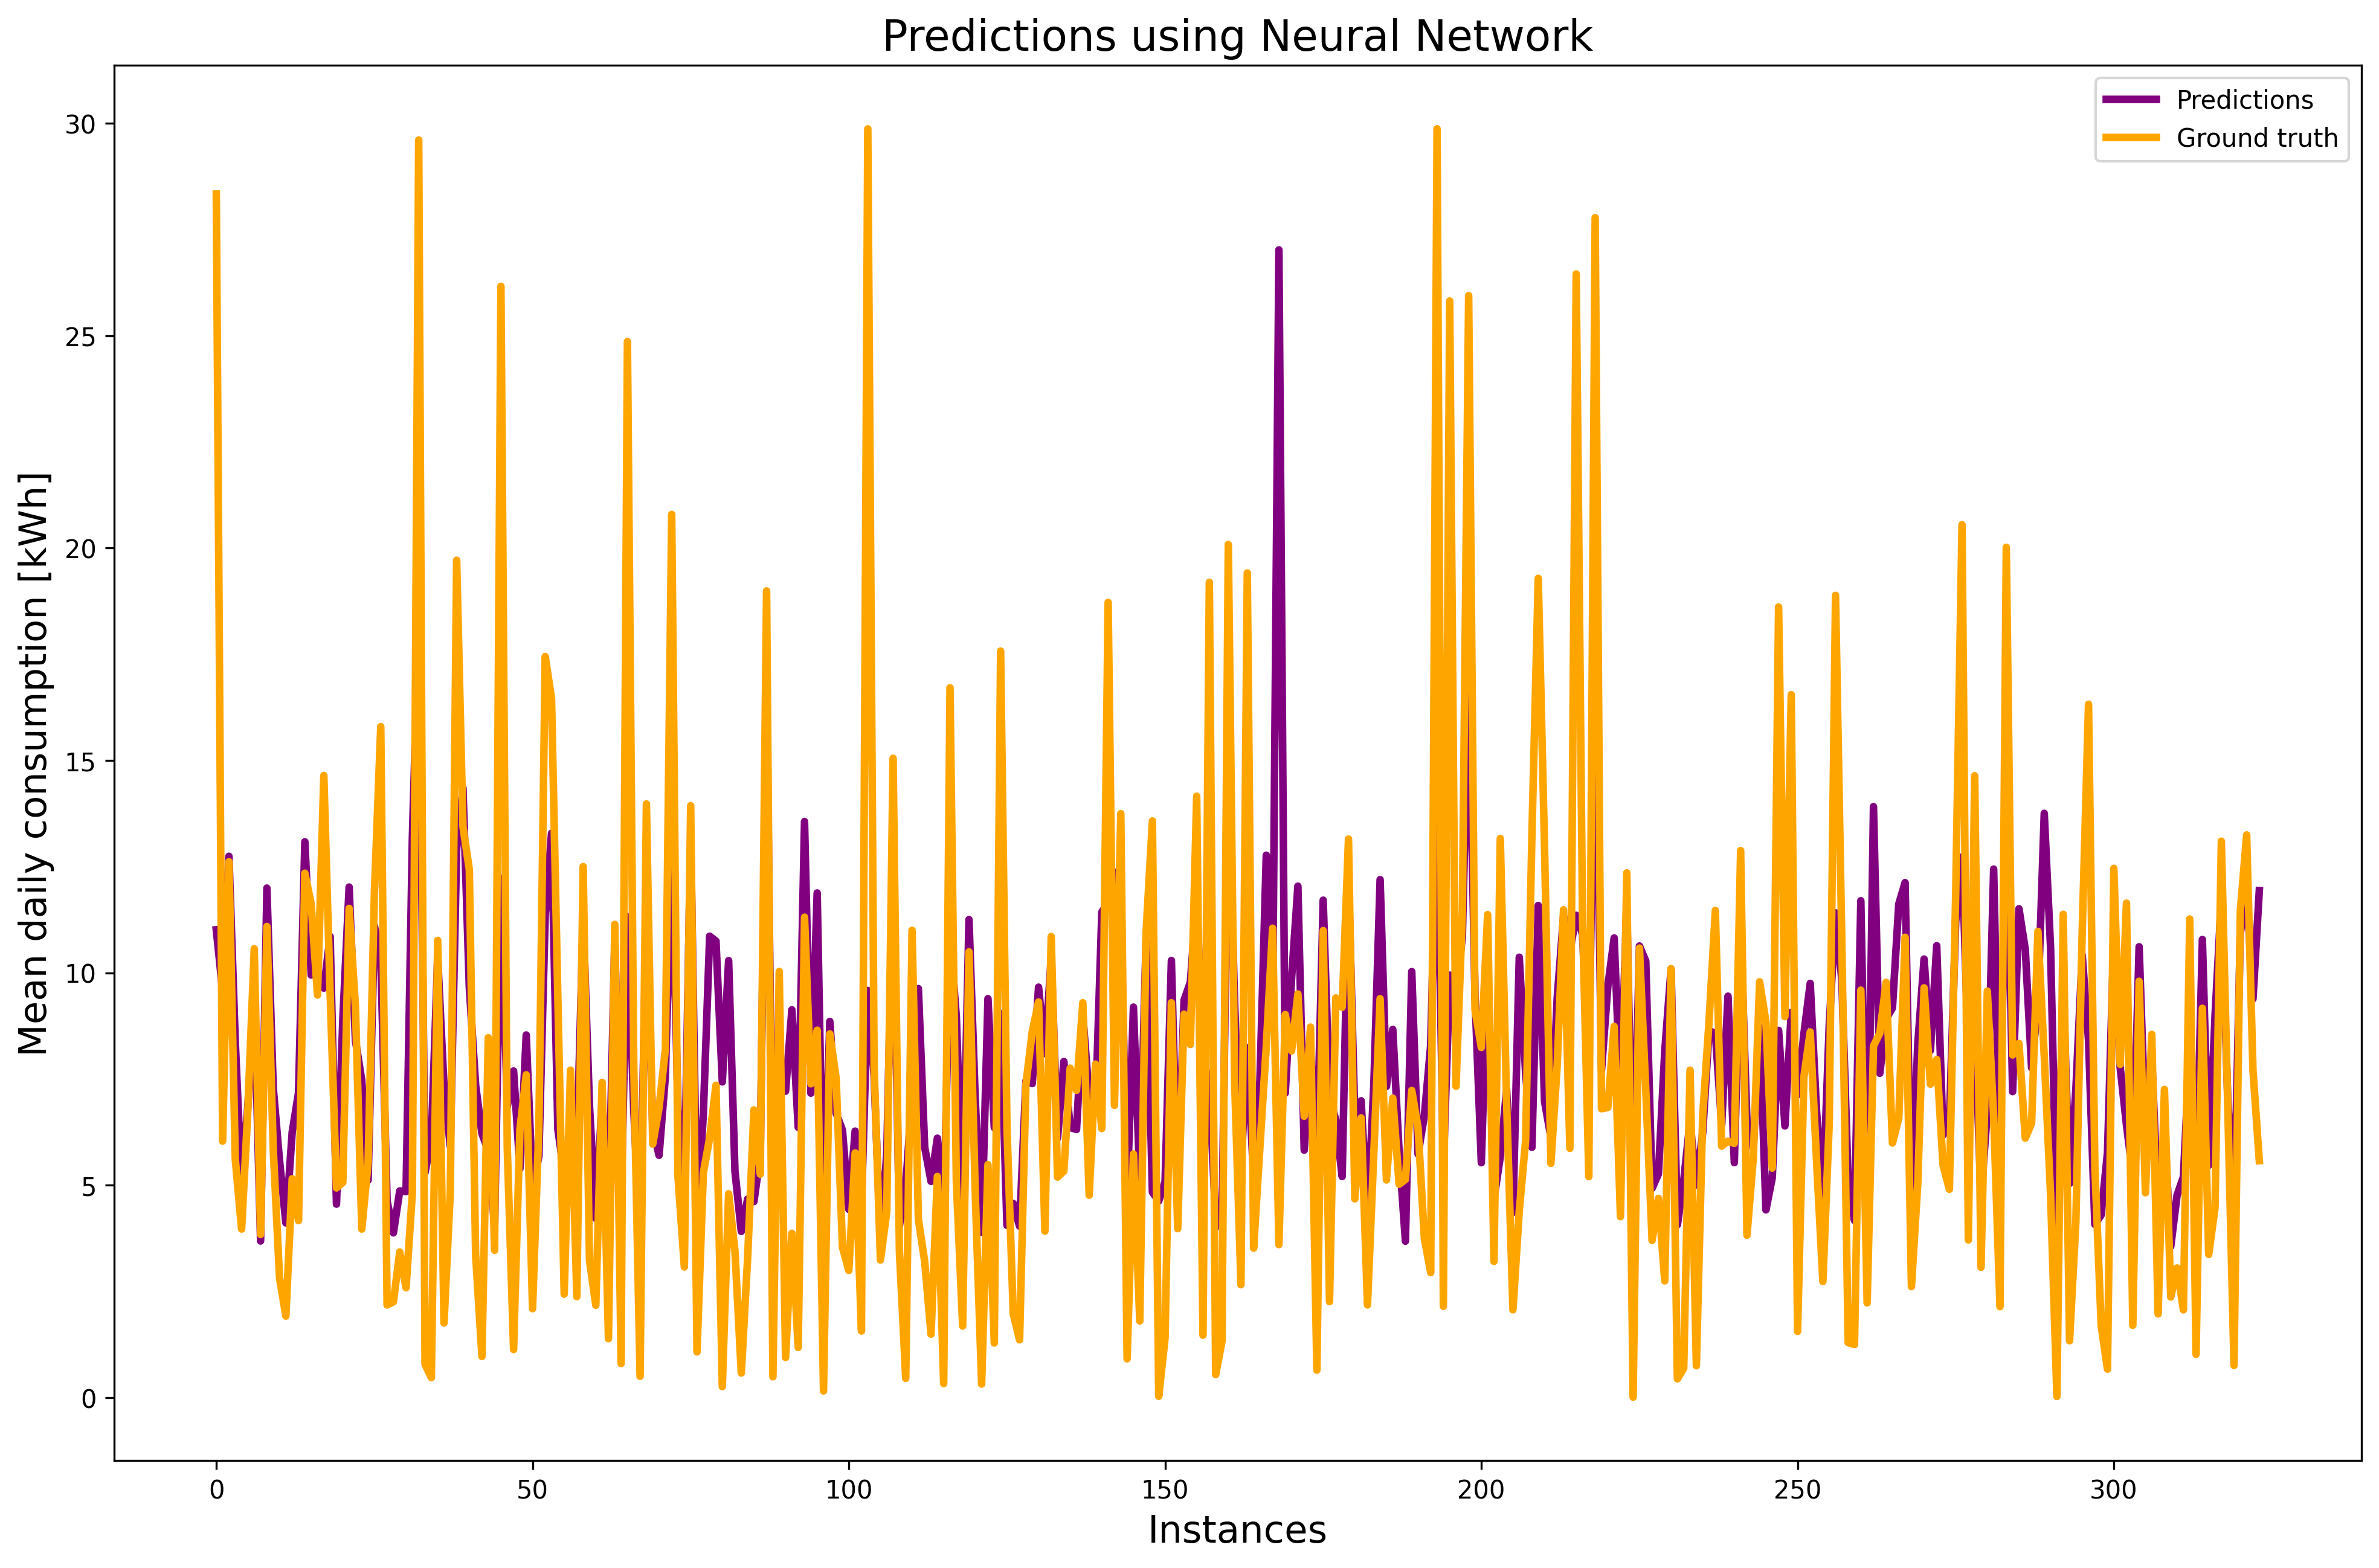

In [413]:
plt.figure(figsize=(16,10),dpi=300)
plt.title('Predictions using Neural Network',fontsize=17)
plt.plot(predictions_unscaled,label='Predictions',linewidth=3,color='purple')
plt.plot(y_test_unscaled,label='Ground truth',linewidth=3,color='orange')
plt.xlabel('Instances',fontsize=15)
plt.ylabel('Mean daily consumption [kWh]',fontsize = 15)
plt.legend()
plt.show()

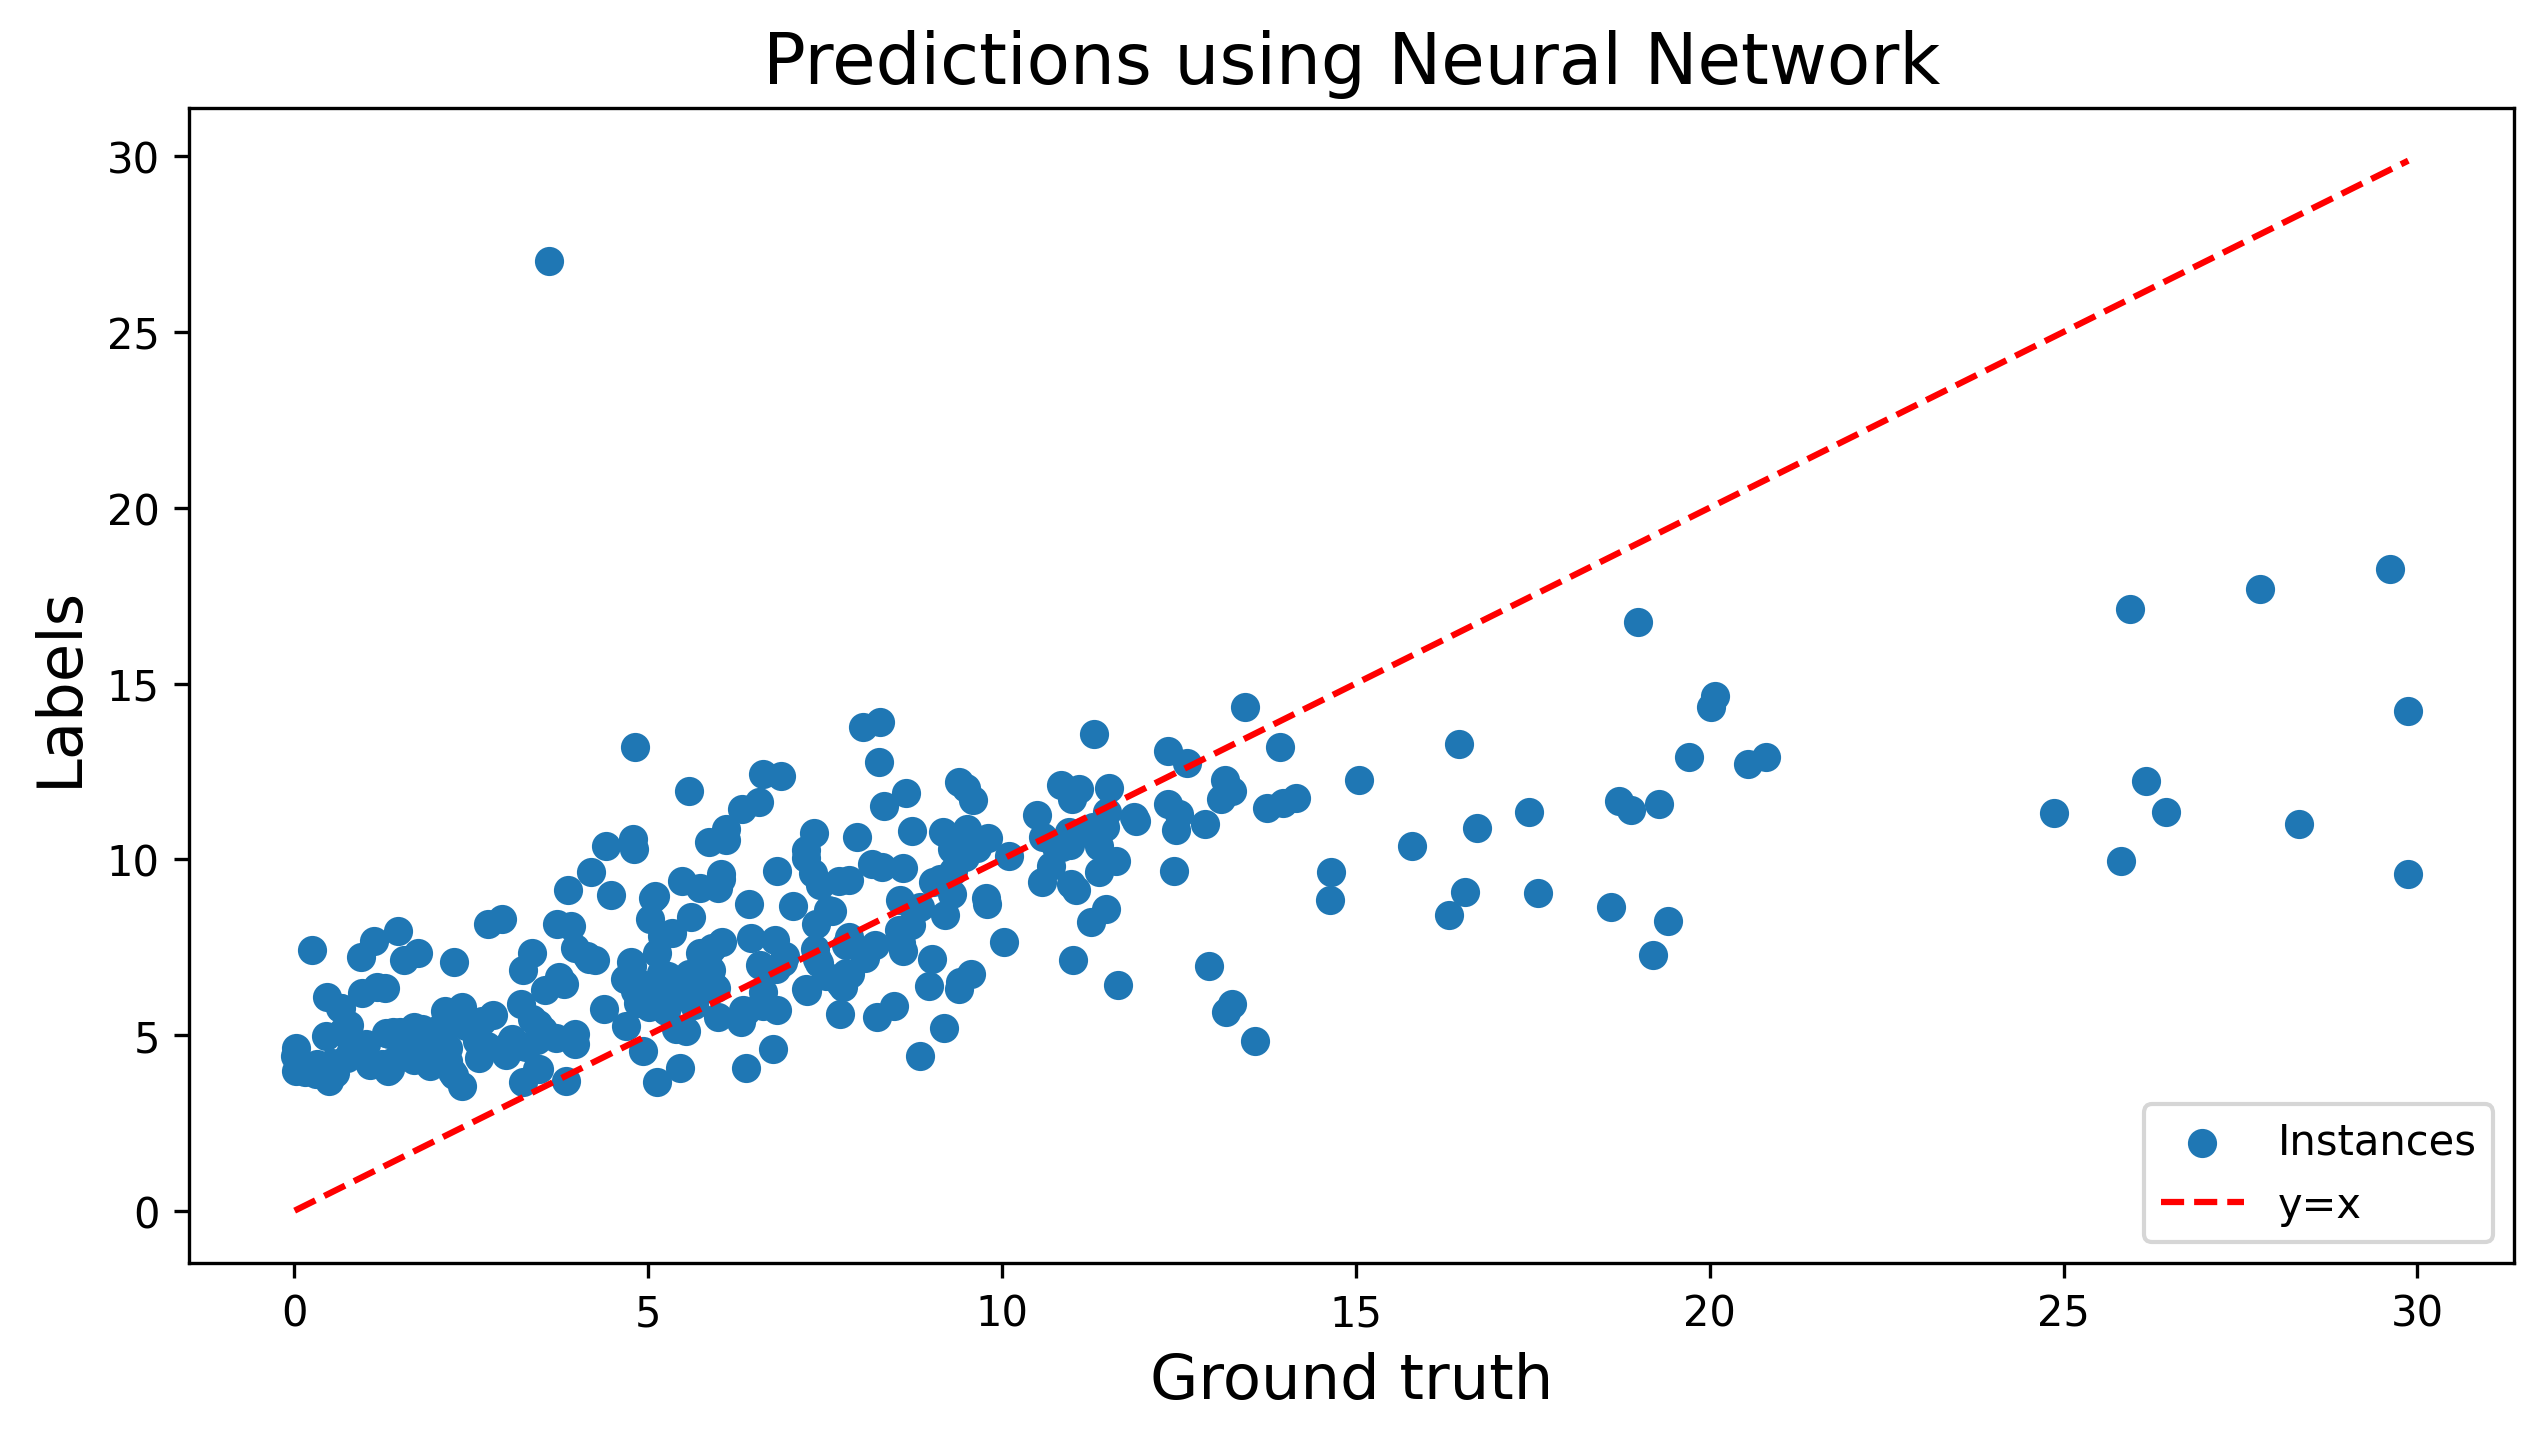

In [414]:
plt.figure(figsize=(10,5),dpi=300)
plt.title('Predictions using Neural Network',fontsize=17)
plt.scatter(y_test_unscaled,predictions_unscaled,label='Instances')
plt.plot([min(y_test_unscaled), max(y_test_unscaled)], 
         [min(y_test_unscaled), max(y_test_unscaled)], 
         linestyle='--', color='red', label='y=x')
plt.xlabel('Ground truth',fontsize=15)
plt.ylabel('Labels',fontsize = 15)
plt.legend()
plt.show()

### Caclulate model's metrics!

In [415]:
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mape = mean_absolute_percentage_error(y_test_unscaled, predictions_unscaled)
rmse = root_mean_squared_error(y_test_unscaled, predictions_unscaled)
r2 = r2_score(y_test_unscaled, predictions_unscaled)

In [416]:
print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("RMSE: ", rmse)
print("R2: ", r2)

MSE:  19.605825322506337
MAE:  3.1047643999749805
MAPE:  3.7637121045603394
RMSE:  4.427846578474274
R2:  0.4219927531241745


In [417]:
# Baseline - sanity check
# Baseline 1: Mean of the data
mean_training = sum(y_test_unscaled) / len(y_test_unscaled)
baseline_mean = [mean_training] * len(y_test_unscaled)

# Baseline 2: Predit zero for all cases
baseline_zero = [0] * len(y_test_unscaled)

# Calculate MAE for each case
mae_model = mean_absolute_error(y_test_unscaled, predictions_unscaled)
mae_baseline_mean = mean_absolute_error(y_test_unscaled, baseline_mean)
mae_baseline_zero = mean_absolute_error(y_test_unscaled, baseline_zero)

# Results
print(f"MAE of the Model: {mae_model:.2f}")
print(f"MAE (Mean Prediction): {mae_baseline_mean:.2f}")
print(f"MAE (Zero Prediction): {mae_baseline_zero:.2f}")


MAE of the Model: 3.10
MAE (Mean Prediction): 4.31
MAE (Zero Prediction): 7.60
